# ILLEGAL PIRATING AND FISHING ACTIVITIES SENSING USING AIS DATA

## Data Source

 https://marinecadastre.gov/ais/
 
 We'll performe analysis on <b>AIS_2017_01_Zone10</b> dataset.

In [10]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
#import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Data Understanding

In [11]:
# read_data file
data = pd.read_csv('AIS_2017_01_Zone01.csv')

In [12]:
data.head()

MMSI         BaseDateTime       LAT        LON   SOG    COG  Heading  \
0  366940480  2017-01-04T11:39:36  52.48730 -174.02316  10.0 -140.7    267.0   
1  366940480  2017-01-04T11:40:45  52.48718 -174.02835  10.0 -141.6    266.0   
2  366940480  2017-01-04T11:42:26  52.48705 -174.03608  10.0 -142.3    267.0   
3  366940480  2017-01-04T13:51:07  52.41575 -174.60041   9.1 -154.0    251.0   
4  366940480  2017-01-04T13:55:17  52.41311 -174.61718   9.1 -157.3    251.0   

   VesselName         IMO CallSign  VesselType     Status  Length  Width  \
0  EARLY DAWN  IMO7821130  WDB7319      1001.0  undefined   32.95   8.82   
1  EARLY DAWN  IMO7821130  WDB7319      1001.0  undefined   32.95   8.82   
2  EARLY DAWN  IMO7821130  WDB7319      1001.0  undefined   32.95   8.82   
3  EARLY DAWN  IMO7821130  WDB7319      1001.0  undefined   32.95   8.82   
4  EARLY DAWN  IMO7821130  WDB7319      1001.0  undefined   32.95   8.82   

   Draft  Cargo  
0    4.0   31.0  
1    4.0   31.0  
2    4.0   31.0  
3    4.0   31.0  
4    4.0   31.0

In [13]:
data.tail()

MMSI         BaseDateTime       LAT        LON  SOG    COG  \
10219  352844000  2017-01-31T22:51:31  51.89778 -176.59334  0.6   30.2   
10220  352844000  2017-01-31T23:06:31  51.89795 -176.59333  0.5 -112.3   
10221  352844000  2017-01-31T23:12:31  51.89772 -176.59347  0.3    1.4   
10222  352844000  2017-01-31T23:30:32  51.89760 -176.59321  1.1 -104.6   
10223  352844000  2017-01-31T23:33:32  51.89748 -176.59305  0.5   99.1   

       Heading VesselName         IMO CallSign  VesselType     Status  Length  \
10219    121.0      JACHA  IMO8512920    3EFC4      1004.0  at anchor   92.21   
10220    145.0      JACHA  IMO8512920    3EFC4      1004.0  at anchor   92.21   
10221    119.0      JACHA  IMO8512920    3EFC4      1004.0  at anchor   92.21   
10222    156.0      JACHA  IMO8512920    3EFC4      1004.0  at anchor   92.21   
10223    118.0      JACHA  IMO8512920    3EFC4      1004.0  at anchor   92.21   

       Width  Draft  Cargo  
10219  16.21    6.6   70.0  
10220  16.21    6.6   70.0  
10221  16.21    6.6   70.0  
10222  16.21    6.6   70.0  
10223  16.21    6.6   70.0

In [14]:
data.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo'],
      dtype='object')

In [15]:
data.describe()

MMSI           LAT           LON           SOG           COG  \
count  1.022400e+04  10224.000000  10224.000000  10224.000000  10224.000000   
mean   3.601466e+08     52.864806   -176.499408      6.007365    -44.786287   
std    4.146926e+07      4.011167      1.108856      4.623338    126.386154   
min    7.959885e+07     19.871820   -179.976560    -51.200000   -204.800000   
25%    3.530030e+08     51.898100   -176.942685      0.300000   -152.000000   
50%    3.669405e+08     52.051215   -176.583150      7.800000   -101.000000   
75%    3.673904e+08     52.360357   -176.060195      9.700000     76.825000   
max    1.054801e+09     75.835590   -174.000110     44.300000    204.700000   

            Heading    VesselType        Length        Width        Draft  \
count  10224.000000  10157.000000  10157.000000  9957.000000  9178.000000   
mean     283.883314   1002.020183     92.207625    15.718723     6.583025   
std      156.884004      9.569983     65.938143     8.880229     3.021365   
min        0.000000     70.000000     11.730000     4.630000     0.900000   
25%      188.000000   1001.000000     37.220000     8.820000     4.000000   
50%      255.000000   1001.000000     89.920000    13.520000     5.800000   
75%      511.000000   1004.000000     92.210000    16.210000     6.600000   
max      511.000000   1025.000000    366.000000    50.000000    18.300000   

             Cargo  
count  6720.000000  
mean     46.243155  
std      19.811963  
min      30.000000  
25%      31.000000  
50%      31.000000  
75%      70.000000  
max      82.000000

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10224 entries, 0 to 10223
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MMSI          10224 non-null  int64  
 1   BaseDateTime  10224 non-null  object 
 2   LAT           10224 non-null  float64
 3   LON           10224 non-null  float64
 4   SOG           10224 non-null  float64
 5   COG           10224 non-null  float64
 6   Heading       10224 non-null  float64
 7   VesselName    10157 non-null  object 
 8   IMO           10156 non-null  object 
 9   CallSign      10156 non-null  object 
 10  VesselType    10157 non-null  float64
 11  Status        10221 non-null  object 
 12  Length        10157 non-null  float64
 13  Width         9957 non-null   float64
 14  Draft         9178 non-null   float64
 15  Cargo         6720 non-null   float64
dtypes: float64(10), int64(1), object(5)
memory usage: 1.2+ MB


In [17]:
data.dtypes

MMSI              int64
BaseDateTime     object
LAT             float64
LON             float64
SOG             float64
COG             float64
Heading         float64
VesselName       object
IMO              object
CallSign         object
VesselType      float64
Status           object
Length          float64
Width           float64
Draft           float64
Cargo           float64
dtype: object

<a id='l2'></a>
## 1. Data Cleaning

<a id='l2.1'></a>
#### 1.1. Data contains missing values (how to use linear interpolation to solve it?)

In [18]:
# find which column contain missing values
data.isnull().any()

MMSI            False
BaseDateTime    False
LAT             False
LON             False
SOG             False
COG             False
Heading         False
VesselName       True
IMO              True
CallSign         True
VesselType       True
Status           True
Length           True
Width            True
Draft            True
Cargo            True
dtype: bool

In [19]:
# put all columns in a list that contain missing values

missing_values_columns = data.columns[data.isnull().any()].tolist()
missing_values_columns

['VesselName',
 'IMO',
 'CallSign',
 'VesselType',
 'Status',
 'Length',
 'Width',
 'Draft',
 'Cargo']

In [20]:
# check how much data contain missing values by one column
data['VesselName'].isnull().sum()

67

Now we make a df that gives the record about how much missing values exist in every column.

In [21]:
count_missing_values = []
for i in missing_values_columns:
    count = data[i].isnull().sum()
    count_missing_values.append(count)
    

missing_values_record = pd.DataFrame({'Column name': missing_values_columns,
                                     'Missing Value Count': count_missing_values})

missing_values_record

Column name  Missing Value Count
0  VesselName                   67
1         IMO                   68
2    CallSign                   68
3  VesselType                   67
4      Status                    3
5      Length                   67
6       Width                  267
7       Draft                 1046
8       Cargo                 3504

The above Data frame describes the no.of missing values every column contains. So now we fill missing values by <b>"linear interpolation"</b>.

In [22]:
#data = data.interpolate(method ='linear', limit_direction ='forward') 
data = data.interpolate(method='linear', axis=0).ffill().bfill()

Now there is no missing value exist

In [23]:
count_missing_values = []
for i in missing_values_columns:
    count = data[i].isnull().sum()
    count_missing_values.append(count)
    

missing_values_record = pd.DataFrame({'Column name': missing_values_columns,
                                     'Missing Value Count': count_missing_values})

missing_values_record

Column name  Missing Value Count
0  VesselName                    0
1         IMO                    0
2    CallSign                    0
3  VesselType                    0
4      Status                    0
5      Length                    0
6       Width                    0
7       Draft                    0
8       Cargo                    0

<a id='l3'></a>
## 2. Create a machine learning model that detects anomalies in vessel tracks

<a id='l3.1'></a>
#### 2.1. How to calculate the track of a vessel (one MMSI represents one single vessel)

In [24]:
# one MMSI represents one single vessel)
data['MMSI'].value_counts()

367390380     2846
366940480     2524
352844000     1314
273898000      823
366988820      778
373889000      740
355972000      223
353003000      176
255805913      130
477348200       89
477027500       89
311056400       62
477982600       61
356159000       60
477444700       55
273318720       49
355113000       28
636090965       21
477099600       21
370633000       17
477027300       16
355139000       16
354001000       14
477135600       12
211517000       11
636092722        7
412436952        6
538006238        4
477108100        2
374553000        2
367421606        1
367678658        1
229947000        1
353073000        1
565328000        1
955775999        1
271041862        1
352255000        1
316022036        1
636017139        1
366824942        1
79598850         1
355120000        1
636016266        1
566352000        1
904937494        1
563317000        1
733907332        1
538006875        1
563004900        1
1054800843       1
367215204        1
365990248   

We'll calculate track of the top 3 vessels, that MMSI is given below.<br>
1- 367390380<br>
2- 366940480<br>
3- 352844000


In [25]:
# Make dataframe of the vessel with name track1
track1 = data[data['MMSI'] == 367390380]
track1.head()

MMSI         BaseDateTime       LAT        LON  SOG    COG  \
3189  367390380  2017-01-29T14:32:05  52.42239 -174.63415  8.9 -154.5   
3190  367390380  2017-01-29T15:30:06  52.38885 -174.85848  9.2 -148.7   
3191  367390380  2017-01-29T15:34:44  52.38635 -174.87590  7.9 -155.3   
3192  367390380  2017-01-29T15:45:34  52.38011 -174.91615  8.2 -159.9   
3193  367390380  2017-01-29T15:46:36  52.37952 -174.91988  9.0 -147.5   

      Heading        VesselName         IMO CallSign  VesselType  \
3189    511.0  SEAFREEZE ALASKA  IMO6931043  WDE7203      1001.0   
3190    511.0  SEAFREEZE ALASKA  IMO6931043  WDE7203      1001.0   
3191    511.0  SEAFREEZE ALASKA  IMO6931043  WDE7203      1001.0   
3192    511.0  SEAFREEZE ALASKA  IMO6931043  WDE7203      1001.0   
3193    511.0  SEAFREEZE ALASKA  IMO6931043  WDE7203      1001.0   

                      Status  Length  Width  Draft      Cargo  
3189  under way using engine   89.92  13.52    5.8  52.666667  
3190  under way using engine   89.92  13.52    5.8  48.333333  
3191  under way using engine   89.92  13.52    5.8  44.000000  
3192  under way using engine   89.92  13.52    5.8  39.666667  
3193  under way using engine   89.92  13.52    5.8  35.333333

<a id='l3.2'></a>
#### 2.2 Support Vector Machines (SVM) to detect vessel anomaly behavior

We'll make the ML model for the only track1 to identify its anomaly behavior detection.


In [26]:
# importing all libraries
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [27]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [28]:
# Seperating year, month, day, hr & minute from BaseDateTime and join them in track1(dataframe) as feature.
year = pd.DatetimeIndex(track1['BaseDateTime']).year.tolist()

month = pd.DatetimeIndex(track1['BaseDateTime']).month.tolist()

day = pd.DatetimeIndex(track1['BaseDateTime']).day.tolist()

hour = pd.DatetimeIndex(track1['BaseDateTime']).hour.tolist()

minute = pd.DatetimeIndex(track1['BaseDateTime']).minute.tolist()

track1['Year'] = year
track1['month'] = month 
track1['day'] = day
track1['hour'] = hour
track1['minute'] = minute

<ipython-input-28-a8fd4699ec4c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track1['Year'] = year
<ipython-input-28-a8fd4699ec4c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track1['month'] = month
<ipython-input-28-a8fd4699ec4c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [29]:
track1.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'Year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [30]:
# finding best features to make model.
track1.corrwith(track1.SOG).sort_values(ascending=False)

SOG           1.000000e+00
LAT           4.903991e-01
hour          3.849963e-01
minute        1.648821e-02
Length       -1.091174e-15
Draft        -1.091174e-15
day          -6.606087e-02
LON          -8.101978e-02
Cargo        -3.084407e-01
COG          -3.793141e-01
MMSI                   NaN
Heading                NaN
VesselType             NaN
Width                  NaN
Year                   NaN
month                  NaN
dtype: float64

<AxesSubplot:title={'center':'Correlation with class'}>

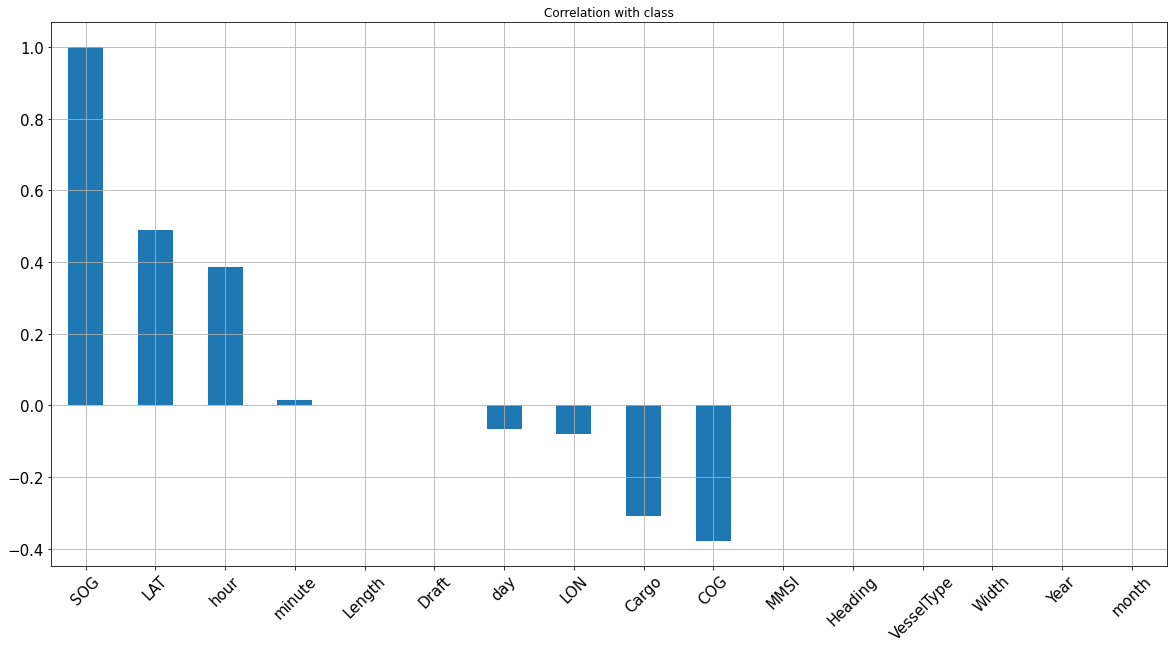

In [31]:
track1.corrwith(track1.SOG).sort_values(ascending=False).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

So for a training model that predicts SOG, we have the following features.


In [32]:
y = track1['SOG'].ravel()
y

array([8.9, 9.2, 7.9, ..., 3.1, 4.8, 4.2])

In [33]:
X = track1[['LAT', 'hour','Cargo', 'COG']]

In [34]:
X

LAT  hour      Cargo    COG
3189   52.42239    14  52.666667 -154.5
3190   52.38885    15  48.333333 -148.7
3191   52.38635    15  44.000000 -155.3
3192   52.38011    15  39.666667 -159.9
3193   52.37952    15  35.333333 -147.5
...         ...   ...        ...    ...
10134  51.70933    23  70.454545  130.2
10135  51.70100    23  70.363636  161.7
10136  51.70044    23  70.272727  152.5
10137  51.70213    23  70.181818  -69.9
10138  51.70825    23  70.090909   13.8

[2846 rows x 4 columns]

Normalize all the features with in range(0,1)

In [35]:
'''
from sklearn.preprocessing import StandardScaler
X['normalizedLAT'] = StandardScaler().fit_transform(X['LAT'].values.reshape(-1,1))
X['normalizedhour'] = StandardScaler().fit_transform(X['hour'].values.reshape(-1,1))
X['normalizedday'] = StandardScaler().fit_transform(X['day'].values.reshape(-1,1))
X['normalizedLon'] = StandardScaler().fit_transform(X['LON'].values.reshape(-1,1))
X['normalizedCargo'] = StandardScaler().fit_transform(X['Cargo'].values.reshape(-1,1))
X['normalizedCOG'] = StandardScaler().fit_transform(X['COG'].values.reshape(-1,1))


#track1 = credit_card_data_sample.drop(['Amount'],axis=1)
X.drop(['LAT', 'hour', 'day', 'LON', 'Cargo', 'COG'], axis = 1, inplace = True)

'''

"\nfrom sklearn.preprocessing import StandardScaler\nX['normalizedLAT'] = StandardScaler().fit_transform(X['LAT'].values.reshape(-1,1))\nX['normalizedhour'] = StandardScaler().fit_transform(X['hour'].values.reshape(-1,1))\nX['normalizedday'] = StandardScaler().fit_transform(X['day'].values.reshape(-1,1))\nX['normalizedLon'] = StandardScaler().fit_transform(X['LON'].values.reshape(-1,1))\nX['normalizedCargo'] = StandardScaler().fit_transform(X['Cargo'].values.reshape(-1,1))\nX['normalizedCOG'] = StandardScaler().fit_transform(X['COG'].values.reshape(-1,1))\n\n\n#track1 = credit_card_data_sample.drop(['Amount'],axis=1)\nX.drop(['LAT', 'hour', 'day', 'LON', 'Cargo', 'COG'], axis = 1, inplace = True)\n\n"

In [36]:
X.head()

LAT  hour      Cargo    COG
3189  52.42239    14  52.666667 -154.5
3190  52.38885    15  48.333333 -148.7
3191  52.38635    15  44.000000 -155.3
3192  52.38011    15  39.666667 -159.9
3193  52.37952    15  35.333333 -147.5

In [37]:
y[:5]

array([8.9, 9.2, 7.9, 8.2, 9. ])

In [38]:
# train & test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2419, 4) (2419,)
Test set: (427, 4) (427,)


In [39]:
# import SVR from SVM
from sklearn.svm import SVR

In [40]:
# building model 
regressor = SVR(gamma='scale', C = 100000, epsilon=1, degree=3)

In [41]:
# fitting model
regressor.fit(x_train, y_train)

SVR(C=100000, epsilon=1)

In [42]:
yhat = regressor.predict(x_test)
yhat [0:5]

array([ 0.16599652,  0.06608487,  0.23872841, 11.89131917,  2.72496179])

In [43]:
# find accuracy(R2 Score)
from sklearn.metrics import r2_score
print(round(r2_score(y_test, yhat),2))

0.65


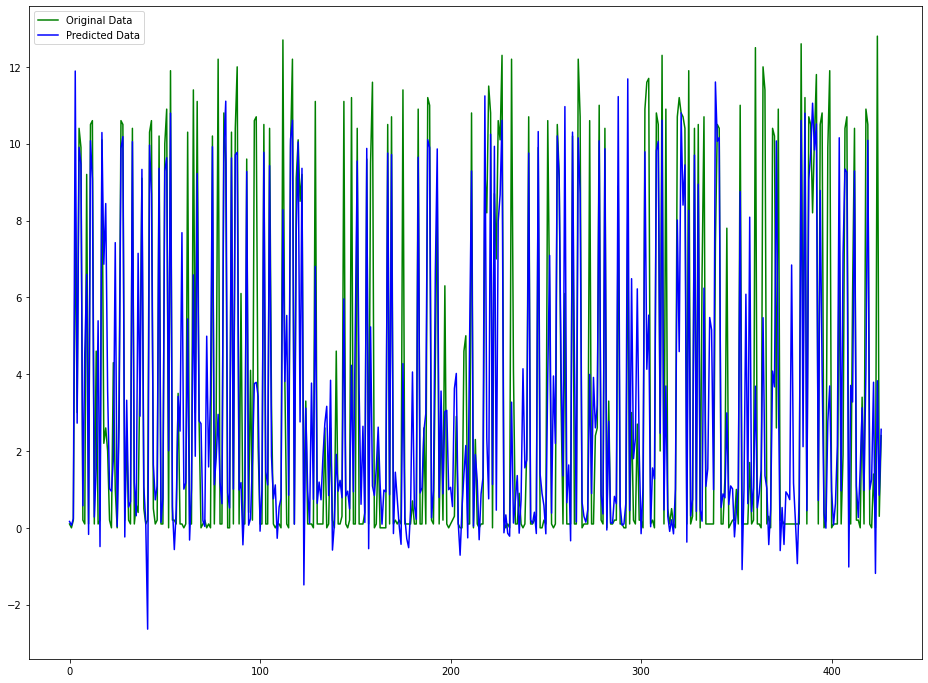

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
labels = ['Original Data', 'Predicted Data']
plt.plot(y_test, color = 'green', label = 'Original Data')
plt.plot(yhat, color = 'blue', label = 'Predicted Data')
plt.legend(labels)
plt.show()

In [45]:
# round off predicted values
import numpy as np
yhat = np.round(yhat,1)
yhat[:5]

array([ 0.2,  0.1,  0.2, 11.9,  2.7])

In [46]:
# make df of predicted & real values
predicted_vs_real = pd.DataFrame({'Actual': y_test,
                                 'Predicted': yhat})

predicted_vs_real

Actual  Predicted
0       0.1        0.2
1       0.0        0.1
2       0.2        0.2
3       8.3       11.9
4       3.0        2.7
..      ...        ...
422     1.4        3.8
423     0.0       -1.2
424    12.8        3.8
425     0.3        0.9
426     2.4        2.6

[427 rows x 2 columns]

In [47]:
predicted_vs_real['difference'] = predicted_vs_real['Actual'] - predicted_vs_real['Predicted']
predicted_vs_real

Actual  Predicted  difference
0       0.1        0.2        -0.1
1       0.0        0.1        -0.1
2       0.2        0.2         0.0
3       8.3       11.9        -3.6
4       3.0        2.7         0.3
..      ...        ...         ...
422     1.4        3.8        -2.4
423     0.0       -1.2         1.2
424    12.8        3.8         9.0
425     0.3        0.9        -0.6
426     2.4        2.6        -0.2

[427 rows x 3 columns]

In [48]:
rounded_difference = predicted_vs_real['difference'].tolist()
rounded_difference = np.round(rounded_difference,0)

In [49]:
predicted_vs_real['Rounded Difference'] = rounded_difference
predicted_vs_real

Actual  Predicted  difference  Rounded Difference
0       0.1        0.2        -0.1                -0.0
1       0.0        0.1        -0.1                -0.0
2       0.2        0.2         0.0                 0.0
3       8.3       11.9        -3.6                -4.0
4       3.0        2.7         0.3                 0.0
..      ...        ...         ...                 ...
422     1.4        3.8        -2.4                -2.0
423     0.0       -1.2         1.2                 1.0
424    12.8        3.8         9.0                 9.0
425     0.3        0.9        -0.6                -1.0
426     2.4        2.6        -0.2                -0.0

[427 rows x 4 columns]

In [50]:
predicted_vs_real['Rounded Difference'].value_counts()

-0.0     142
-1.0     105
 1.0      49
-2.0      22
 2.0      19
-4.0      14
 7.0      12
-5.0      10
 3.0      10
 6.0       8
-3.0       7
 4.0       7
 5.0       5
-6.0       4
 9.0       4
 10.0      2
-7.0       2
 8.0       2
-8.0       2
 11.0      1
Name: Rounded Difference, dtype: int64

In [51]:
# The rows giving larger difference are anamolous
anamolies = predicted_vs_real[(predicted_vs_real['Rounded Difference']>= 6) |(predicted_vs_real['Rounded Difference']<= -6)] 
anamolies

Actual  Predicted  difference  Rounded Difference
19      2.6        8.4        -5.8                -6.0
24      1.0        7.4        -6.4                -6.0
36      0.4        7.1        -6.7                -7.0
59      0.1        7.7        -7.6                -8.0
78     12.2        3.0         9.2                 9.0
97     10.6        3.8         6.8                 7.0
98     10.7        3.8         6.9                 7.0
121     8.5        2.8         5.7                 6.0
148    11.2        4.2         7.0                 7.0
159    11.6        1.1        10.5                10.0
175    11.4        4.3         7.1                 7.0
219     8.2        2.3         5.9                 6.0
220    11.5        0.8        10.7                11.0
224     7.0        0.5         6.5                 6.0
232    12.2        3.3         8.9                 9.0
251    10.6        4.0         6.6                 7.0
273    10.6        4.0         6.6                 7.0
303    11.6        4.1         7.5                 8.0
304    11.7        5.5         6.2                 6.0
313    10.9        3.7         7.2                 7.0
320    11.2        4.6         6.6                 7.0
332     6.6        0.2         6.4                 6.0
355     0.1        6.1        -6.0                -6.0
357     1.7        8.1        -6.4                -6.0
360    12.5        3.7         8.8                 9.0
364    12.0        5.5         6.5                 6.0
365    11.4        1.4        10.0                10.0
369    10.4        4.1         6.3                 6.0
370    10.2        3.7         6.5                 6.0
371     2.6       10.1        -7.5                -8.0
372    10.9        3.9         7.0                 7.0
379     0.1        6.8        -6.7                -7.0
395    10.8        4.1         6.7                 7.0
398     9.9        2.8         7.1                 7.0
399    11.9        3.7         8.2                 8.0
418    10.9        4.1         6.8                 7.0
424    12.8        3.8         9.0                 9.0

In [52]:
len(x_test)

427

In [53]:
x_test.reset_index(inplace = True)

In [54]:
x_test.drop('index', axis = 1, inplace = True)

/home/dell/vessel/vessel/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
x_test

LAT  hour      Cargo    COG
0    51.89729     0  70.000000   51.8
1    51.89767    23  70.000000  144.3
2    51.89843     1  70.000000   57.3
3    52.38197    15  40.000000 -157.5
4    51.69561    23  31.000000  161.6
..        ...   ...        ...    ...
422  51.71227    22  61.884058 -142.3
423  51.89762     2  41.211073  -60.4
424  51.97506    16  75.000000 -142.8
425  51.89768    22  70.000000  187.7
426  51.69042    20  74.500000  124.6

[427 rows x 4 columns]

In [56]:
anamolies_indices = anamolies.index.tolist()
anamolies_indices

[19,
 24,
 36,
 59,
 78,
 97,
 98,
 121,
 148,
 159,
 175,
 219,
 220,
 224,
 232,
 251,
 273,
 303,
 304,
 313,
 320,
 332,
 355,
 357,
 360,
 364,
 365,
 369,
 370,
 371,
 372,
 379,
 395,
 398,
 399,
 418,
 424]

In [57]:
# So now the anomalies are:
x_test.iloc[anamolies_indices]

LAT  hour      Cargo    COG
19   51.71237    22  31.000000 -132.1
24   51.90048    23  70.000000 -170.4
36   51.89885    23  70.000000 -166.0
59   51.89733    23  70.000000 -175.8
78   51.94772    16  70.000000 -191.6
97   52.01230    12  70.000000 -140.5
98   52.00940    12  70.000000 -143.7
121  51.80671    17  79.500000  193.7
148  51.98351    15  70.000000 -144.9
159  51.94163    10  70.000000  -55.9
175  51.98929    15  70.000000 -143.9
219  51.71196    22  71.800000   70.3
220  52.01216    11  70.000000  -63.3
224  51.67766    19  79.000000 -106.2
232  52.01762    11  70.000000 -131.7
251  52.00270    13  70.000000 -144.3
273  51.99378    14  70.000000 -140.8
303  51.99098    15  70.000000 -139.4
304  52.01848    11  61.111111 -143.0
313  52.01134    12  70.000000 -138.7
320  52.00497    13  66.307692 -139.7
332  51.71765    20  74.015385  -90.8
355  51.89762    21  70.000000 -180.0
357  52.35912    16  38.428571 -112.2
360  52.02018    11  70.000000 -143.7
364  51.96475    16  30.000000 -187.5
365  51.69327    20  62.615385  -57.2
369  51.99500    14  70.000000 -143.3
370  52.00718    12  70.000000 -139.5
371  51.68331    19  30.000000 -130.7
372  52.00360    13  70.000000 -140.9
379  51.89890    23  70.000000 -161.2
395  51.99818    14  70.000000 -142.4
398  51.91418    16  70.000000 -199.0
399  51.96832    10  45.308642  -60.4
418  51.99952    14  70.000000 -141.6
424  51.97506    16  75.000000 -142.8

The rows of the above data frame containing anomalous values.

### <a id='l1.1'></a>
### 3. Trajectory Visualizations (Data Analysis)

<a id='l1.2'></a>
#### 3.1. What is the average track length?

<b>Mode:</b> In stats, the mode is the one that appears the most in any range of numbers. Here to find average we find mode.

In [58]:
value_count = data['Length'].value_counts()
value_count

89.920000     2846
32.950000     2524
92.210000     1314
63.970000      823
37.220000      778
              ... 
87.285000        1
47.760000        1
123.075312       1
71.475000        1
42.490000        1
Name: Length, Length: 97, dtype: int64

We can observe that 89.92 is the length that is appearing most of the time in data, so it is the average length of our data.

In [59]:
# find mode(average track length)
mode = data['Length'].mode()
mode = mode[0]
mode

89.92

In [60]:
print("The average track length is "+str(mode))

The average track length is 89.92


<a id='l1.3'></a>
#### 3.2  Does SOG and COG vary depending on vessel type?

To find the relation b/w SOG & vessel type and COG & vessel type, we use correlation.

In [61]:
corr1 = round(data['SOG'].corr(data['VesselType']),2)
print("The correlation b/w SOG and vessel type is "+str(corr1)+" that is very small, so we can say that SOG does not vary depending upon vessel type.")

The correlation b/w SOG and vessel type is 0.02 that is very small, so we can say that SOG does not vary depending upon vessel type.


In [62]:
corr2 = round(data['COG'].corr(data['VesselType']),2)
print("The correlation b/w COG and vessel type is "+str(corr2)+" that is also very small, so we can say that COG does not vary depending upon vessel type.")

The correlation b/w COG and vessel type is 0.04 that is also very small, so we can say that COG does not vary depending upon vessel type.


<a id='l1.4'></a>
#### 3.3. How does vessel size (length and width) modify SOG or COG)?

In [63]:
# length with SOG
corr3 = round(data['Length'].corr(data['SOG']),2)
print("The correlation b/w Length and SOG is "+str(corr3)+" so we can say that vessel length modify SOG around 10%")

The correlation b/w Length and SOG is 0.1 so we can say that vessel length modify SOG around 10%


In [64]:
# length with COG
corr4 = round(data['Length'].corr(data['COG']),2)
print("The correlation b/w Length and COG is "+str(corr4)+" so we can say that vessel length modify COG around 16%.")

The correlation b/w Length and COG is 0.16 so we can say that vessel length modify COG around 16%.


In [65]:
# width with SOG
corr5 = round(data['Width'].corr(data['SOG']),2)
print("The correlation b/w Width and SOG is "+str(corr5)+" so we can say that vessel width modify SOG around 12%.")


The correlation b/w Width and SOG is 0.12 so we can say that vessel width modify SOG around 12%.


In [66]:
# width with COG

corr6 = round(data['Width'].corr(data['COG']),2)
print("The correlation b/w Width and COG is "+str(corr6)+" so we can say that vessel width modify COG around 13%.")


The correlation b/w Width and COG is 0.14 so we can say that vessel width modify COG around 13%.


<a id='l1.5'></a>
#### 3.4. What is the average speed of the ships?

In [67]:
# To find avg speed of the ships(SOG) Speed over ground, we find mode

value_count = data['SOG'].value_counts()
value_count

 0.1     1566
 0.2      443
 0.0      405
 9.5      234
 9.6      233
         ... 
 19.3       1
 17.4       1
 15.4       1
 44.3       1
-28.1       1
Name: SOG, Length: 169, dtype: int64

We can observe that 0.1 is the speed that is appearing most of the time in data, so it is the average speed of our data.

In [68]:
# find mode(average track length)
mode = data['SOG'].mode()
mode = mode[0]
mode

0.1

In [69]:
print('The avg speed of ships are '+str(mode))

The avg speed of ships are 0.1


<a id='l1.6'></a>
#### 3.5. How to modify the BaseDateTime column for analysis?

In [70]:
# 1st check the data type of the column
data['BaseDateTime'].dtype # 

dtype('O')

In [71]:
# check data
data['BaseDateTime'].head()

0    2017-01-04T11:39:36
1    2017-01-04T11:40:45
2    2017-01-04T11:42:26
3    2017-01-04T13:51:07
4    2017-01-04T13:55:17
Name: BaseDateTime, dtype: object

At this time, dtype of columns <b>BaseDateTime</b> is Object, so we change it from object to <b>datetime</b>, so this attribute becomes more comfortable for data analysis.

In [72]:
# changing dtype of BaseDateTime columns from Object to datetime
data['BaseDateTime'] =  pd.to_datetime(data['BaseDateTime'])

In [73]:
data['BaseDateTime'].dtype

dtype('<M8[ns]')

Now the column becomes more easy for data analysis, we can extract datetime parts, such as year, month, day, hour, minute & seconds very easily.

In [74]:
# extract years
pd.DatetimeIndex(data['BaseDateTime']).year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='BaseDateTime', length=10224)

In [75]:
# extract months
pd.DatetimeIndex(data['BaseDateTime']).month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='BaseDateTime', length=10224)

In [76]:
# extract days
pd.DatetimeIndex(data['BaseDateTime']).day

Int64Index([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='BaseDateTime', length=10224)

In [77]:
# extract hours
pd.DatetimeIndex(data['BaseDateTime']).hour

Int64Index([11, 11, 11, 13, 13, 14, 14, 14, 14, 14,
            ...
            20, 20, 21, 22, 22, 22, 23, 23, 23, 23],
           dtype='int64', name='BaseDateTime', length=10224)

In [78]:
# extract minutes
pd.DatetimeIndex(data['BaseDateTime']).minute

Int64Index([39, 40, 42, 51, 55,  6, 19, 24, 29, 54,
            ...
            21, 30, 30,  3, 18, 51,  6, 12, 30, 33],
           dtype='int64', name='BaseDateTime', length=10224)

In [79]:
# extract seconds
pd.DatetimeIndex(data['BaseDateTime']).second

Int64Index([36, 45, 26,  7, 17, 37, 57, 36, 17, 26,
            ...
            26, 27, 28, 29, 30, 31, 31, 31, 32, 32],
           dtype='int64', name='BaseDateTime', length=10224)

<a id='l1.1'></a>
### 3.6 Visualizations (Graphing latitude, longitude points onto a map)

### (i) Simple map using geopandas library

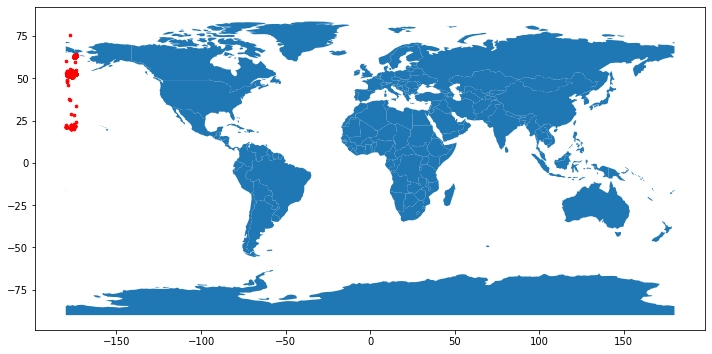

In [80]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(data['LON'], data['LAT'])]
gdf = GeoDataFrame(data, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#plt.axis([-200,-150,0,90])
gdf.plot(ax=world.plot(figsize=(12, 16)), marker='o', color='red', markersize=7);


### (ii) Advance map using folium library

In [81]:
# make array of tuples(tuple contain latitudes & longitudes)
lats_long = []
for i in range(len(data)):
    lats_long.append((data['LAT'][i], data['LON'][i]))
    
lats_long

[(52.4873, -174.02316),
 (52.48718, -174.02835),
 (52.48705, -174.03608),
 (52.41575, -174.60041),
 (52.41311, -174.61718),
 (52.40527, -174.66192),
 (52.39625, -174.71461),
 (52.39278, -174.73318),
 (52.38917, -174.75174),
 (52.36916, -174.85096),
 (52.36112, -174.89224),
 (52.35662, -174.91639),
 (52.35323, -174.93524),
 (52.33886, -175.01363),
 (52.33776, -175.01916),
 (52.33328, -175.04233),
 (52.33142, -175.0519),
 (52.32379, -175.08993),
 (52.31912, -175.11316),
 (52.3138, -175.14107),
 (52.30674, -175.1831),
 (52.29895, -175.22822),
 (52.29807, -175.23314),
 (52.27934, -175.3618),
 (52.27749, -175.37665),
 (52.27078, -175.43518),
 (52.26965, -175.44423),
 (52.26893, -175.4491),
 (52.26706, -175.46309),
 (52.26577, -175.47284),
 (52.24853, -175.58728),
 (52.2436, -175.61771),
 (52.24107, -175.63311),
 (52.2352, -175.6788),
 (52.11135, -176.36222),
 (52.10279, -176.39196),
 (52.09497, -176.41921),
 (52.08746, -176.44557),
 (52.08486, -176.45431),
 (52.07983, -176.47224),
 (52.0774

In [82]:
# find latitude center for all points
lat_mean = data['LAT'].mean()
lat_mean

52.864806201095455

In [83]:
# find longitude center for all points
long_mean = data['LON'].mean()
long_mean

-176.49940768681535

In [84]:
# create folium map with markers
import folium
mapit = folium.Map( location=[52.86480620109543, -176.49940768681523], zoom_start=6 )
for coord in lats_long:
    folium.Marker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=3 ).add_to( mapit )

mapit.save('map.html')

In [85]:
# display map
from IPython.display import HTML, display
display(mapit)

# here the map isn't displaying because of long running script,
#but you can open it from any browser & can see the result. THe map is saved into the folder where Ipython Notebooks are exist

<a id='l3.1'></a>
####  Calculating the track of a vessel (one MMSI represents one single vessel)

In [86]:
# one MMSI represents one single vessel)
data['MMSI'].value_counts()

367390380     2846
366940480     2524
352844000     1314
273898000      823
366988820      778
373889000      740
355972000      223
353003000      176
255805913      130
477348200       89
477027500       89
311056400       62
477982600       61
356159000       60
477444700       55
273318720       49
355113000       28
636090965       21
477099600       21
370633000       17
477027300       16
355139000       16
354001000       14
477135600       12
211517000       11
636092722        7
412436952        6
538006238        4
477108100        2
374553000        2
367421606        1
367678658        1
229947000        1
353073000        1
565328000        1
955775999        1
271041862        1
352255000        1
316022036        1
636017139        1
366824942        1
79598850         1
355120000        1
636016266        1
566352000        1
904937494        1
563317000        1
733907332        1
538006875        1
563004900        1
1054800843       1
367215204        1
365990248   

We'll calculate track of the top 3 vessels, that MMSI is given below.<br>
1- 367390380<br>
2- 366940480<br>
3- 352844000


In [87]:
# Make dataframe of the vessel with name track1
track1 = data[data['MMSI'] == 367390380]
track1.head()

MMSI        BaseDateTime       LAT        LON  SOG    COG  Heading  \
3189  367390380 2017-01-29 14:32:05  52.42239 -174.63415  8.9 -154.5    511.0   
3190  367390380 2017-01-29 15:30:06  52.38885 -174.85848  9.2 -148.7    511.0   
3191  367390380 2017-01-29 15:34:44  52.38635 -174.87590  7.9 -155.3    511.0   
3192  367390380 2017-01-29 15:45:34  52.38011 -174.91615  8.2 -159.9    511.0   
3193  367390380 2017-01-29 15:46:36  52.37952 -174.91988  9.0 -147.5    511.0   

            VesselName         IMO CallSign  VesselType  \
3189  SEAFREEZE ALASKA  IMO6931043  WDE7203      1001.0   
3190  SEAFREEZE ALASKA  IMO6931043  WDE7203      1001.0   
3191  SEAFREEZE ALASKA  IMO6931043  WDE7203      1001.0   
3192  SEAFREEZE ALASKA  IMO6931043  WDE7203      1001.0   
3193  SEAFREEZE ALASKA  IMO6931043  WDE7203      1001.0   

                      Status  Length  Width  Draft      Cargo  \
3189  under way using engine   89.92  13.52    5.8  52.666667   
3190  under way using engine   89.92  13.52    5.8  48.333333   
3191  under way using engine   89.92  13.52    5.8  44.000000   
3192  under way using engine   89.92  13.52    5.8  39.666667   
3193  under way using engine   89.92  13.52    5.8  35.333333   

                         geometry  
3189  POINT (-174.63415 52.42239)  
3190  POINT (-174.85848 52.38885)  
3191  POINT (-174.87590 52.38635)  
3192  POINT (-174.91615 52.38011)  
3193  POINT (-174.91988 52.37952)

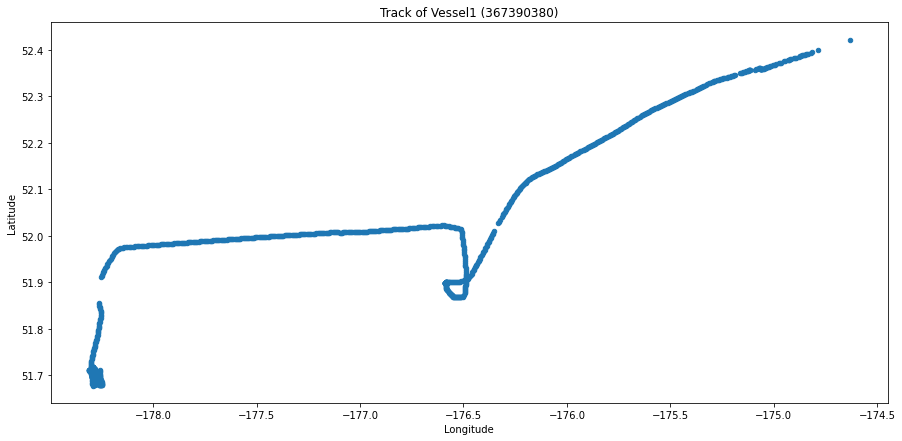

In [88]:
# Now Calculate track of the vessel1(367390380).
import matplotlib.pyplot as plt
track1.plot(kind = 'scatter', x = 'LON', y = 'LAT', figsize=(15,7))

plt.title("Track of Vessel1 (367390380)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [89]:
track2 = data[data['MMSI'] == 366940480]
track2.head()

MMSI        BaseDateTime       LAT        LON   SOG    COG  Heading  \
0  366940480 2017-01-04 11:39:36  52.48730 -174.02316  10.0 -140.7    267.0   
1  366940480 2017-01-04 11:40:45  52.48718 -174.02835  10.0 -141.6    266.0   
2  366940480 2017-01-04 11:42:26  52.48705 -174.03608  10.0 -142.3    267.0   
3  366940480 2017-01-04 13:51:07  52.41575 -174.60041   9.1 -154.0    251.0   
4  366940480 2017-01-04 13:55:17  52.41311 -174.61718   9.1 -157.3    251.0   

   VesselName         IMO CallSign  VesselType     Status  Length  Width  \
0  EARLY DAWN  IMO7821130  WDB7319      1001.0  undefined   32.95   8.82   
1  EARLY DAWN  IMO7821130  WDB7319      1001.0  undefined   32.95   8.82   
2  EARLY DAWN  IMO7821130  WDB7319      1001.0  undefined   32.95   8.82   
3  EARLY DAWN  IMO7821130  WDB7319      1001.0  undefined   32.95   8.82   
4  EARLY DAWN  IMO7821130  WDB7319      1001.0  undefined   32.95   8.82   

   Draft  Cargo                     geometry  
0    4.0   31.0  POINT (-174.02316 52.48730)  
1    4.0   31.0  POINT (-174.02835 52.48718)  
2    4.0   31.0  POINT (-174.03608 52.48705)  
3    4.0   31.0  POINT (-174.60041 52.41575)  
4    4.0   31.0  POINT (-174.61718 52.41311)

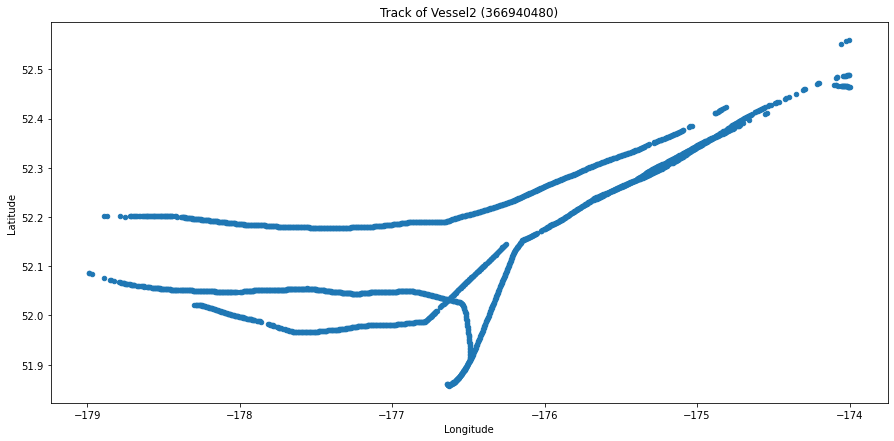

In [90]:
# Calculate track of the vessel2(366940480).
import matplotlib.pyplot as plt
track2.plot(kind = 'scatter', x = 'LON', y = 'LAT', figsize=(15,7))

plt.title("Track of Vessel2 (366940480)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [91]:
track3 = data[data['MMSI'] == 352844000]
track3.head()

MMSI        BaseDateTime       LAT        LON   SOG    COG  \
3426  352844000 2017-01-29 12:13:11  52.54214 -174.71065  12.9 -150.4   
3427  352844000 2017-01-29 12:37:20  52.52387 -174.84625  11.9 -145.9   
3428  352844000 2017-01-29 12:56:10  52.50233 -174.94162  12.0 -165.0   
3429  352844000 2017-01-29 14:27:00  52.40498 -175.36253   8.4 -181.5   
3430  352844000 2017-01-29 14:43:31  52.37812 -175.41420   9.5 -168.2   

      Heading VesselName         IMO CallSign  VesselType  \
3426    251.0      JACHA  IMO8512920    3EFC4      1004.0   
3427    253.0      JACHA  IMO8512920    3EFC4      1004.0   
3428    237.0      JACHA  IMO8512920    3EFC4      1004.0   
3429    216.0      JACHA  IMO8512920    3EFC4      1004.0   
3430    225.0      JACHA  IMO8512920    3EFC4      1004.0   

                      Status  Length  Width  Draft  Cargo  \
3426  under way using engine   92.21  16.21    6.6   70.0   
3427  under way using engine   92.21  16.21    6.6   70.0   
3428  under way using engine   92.21  16.21    6.6   70.0   
3429  under way using engine   92.21  16.21    6.6   70.0   
3430  under way using engine   92.21  16.21    6.6   70.0   

                         geometry  
3426  POINT (-174.71065 52.54214)  
3427  POINT (-174.84625 52.52387)  
3428  POINT (-174.94162 52.50233)  
3429  POINT (-175.36253 52.40498)  
3430  POINT (-175.41420 52.37812)

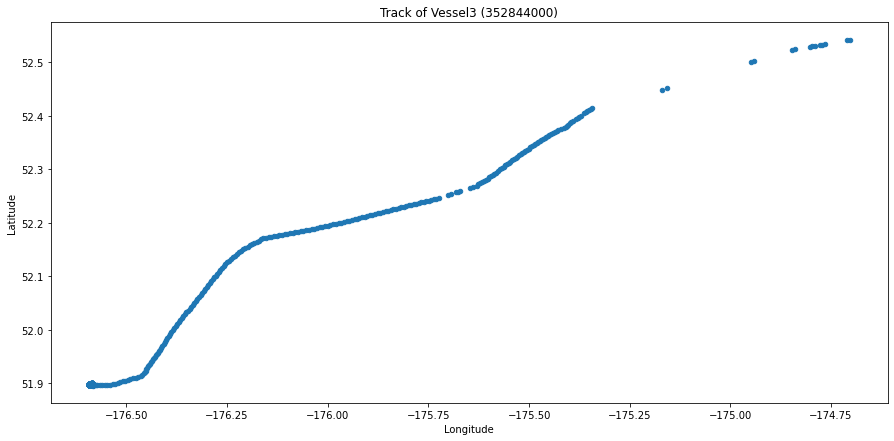

In [92]:
# Calculate track of the vessel3(352844000).
import matplotlib.pyplot as plt
track3.plot(kind = 'scatter', x = 'LON', y = 'LAT', figsize=(15,7))

plt.title("Track of Vessel3 (352844000)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Same as we can calculate track of all vessels

## 4. Detecting Ships using Satellite Imagery

In [93]:
import json, sys, random
import numpy as np

In [94]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

In [95]:
from PIL import Image, ImageDraw 

In [96]:
from matplotlib import pyplot as plt

### Download and study the dataset

In [97]:
# download dataset from json object
f = open('shipsnet.json')
dataset = json.load(f)
f.close()

In [98]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

INPUT

The dataset contains 4000 images. One image is represented as a vector of length 19200 elements.

In [99]:
input_data.shape

(4000, 19200)

In [100]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [101]:
# get one chanel
pic = X[0]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]

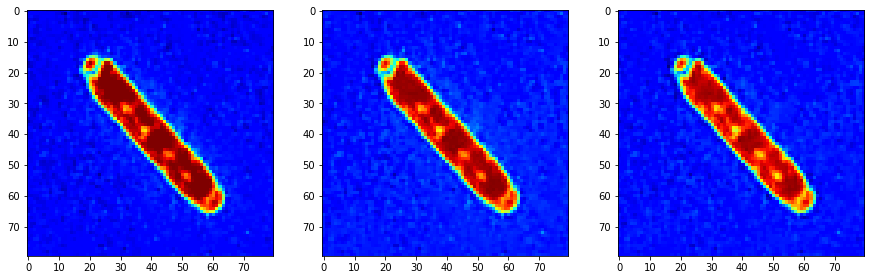

In [102]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
    
plt.show()

OUTPUT

The output is a vector of lenght 4000 elements.

In [103]:
output_data.shape

(4000,)

The vector contains int 0 and 1

In [104]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

Vector contains of 3000 zeros and 1000 units. This means that in a dataset of 1000 images tagged with "ship" and 3000 images marked as "not ship".

In [105]:
np.bincount(output_data)

array([3000, 1000])

### Preparing data

In [106]:
# output encoding
y = np_utils.to_categorical(output_data, 2)

In [107]:
# shuffle all indexes
indexes = np.arange(4000)
np.random.shuffle(indexes)

In [108]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [109]:
# normalization
X_train = X_train / 255

### Traing network

In [110]:
np.random.seed(42)

In [111]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [112]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Epoch 1/18
100/100 - 17s - loss: 0.4449 - accuracy: 0.8009 - val_loss: 0.2519 - val_accuracy: 0.9050
Epoch 2/18
100/100 - 16s - loss: 0.2457 - accuracy: 0.8941 - val_loss: 0.2107 - val_accuracy: 0.9275
Epoch 3/18
100/100 - 14s - loss: 0.1923 - accuracy: 0.9203 - val_loss: 0.1554 - val_accuracy: 0.9475
Epoch 4/18
100/100 - 14s - loss: 0.1667 - accuracy: 0.9316 - val_loss: 0.1210 - val_accuracy: 0.9600
Epoch 5/18
100/100 - 14s - loss: 0.1337 - accuracy: 0.9494 - val_loss: 0.1135 - val_accuracy: 0.9613
Epoch 6/18
100/100 - 14s - loss: 0.1162 - accuracy: 0.9578 - val_loss: 0.0865 - val_accuracy: 0.9775
Epoch 7/18
100/100 - 14s - loss: 0.1100 - accuracy: 0.9600 - val_loss: 0.1335 - val_accuracy: 0.9575
Epoch 8/18
100/100 - 14s - loss: 0.1198 - accuracy: 0.9578 - val_loss: 0.0940 - val_accuracy: 0.9688
Epoch 9/18
100/100 - 14s - loss: 0.0822 - accuracy: 0.9694 - val_loss: 0.0675 - val_accuracy: 0.9812
Epoch 10/18
100/100 - 14s - loss: 0.0898 - accuracy: 0.9678 - val_loss: 0.0593 - val_accura

# Using network

### Download image

In [113]:
image = Image.open('sfbay_1.png')
pix = image.load()

In [114]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [115]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [116]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

In [117]:
picture_tensor.shape

(1777, 2825, 3)

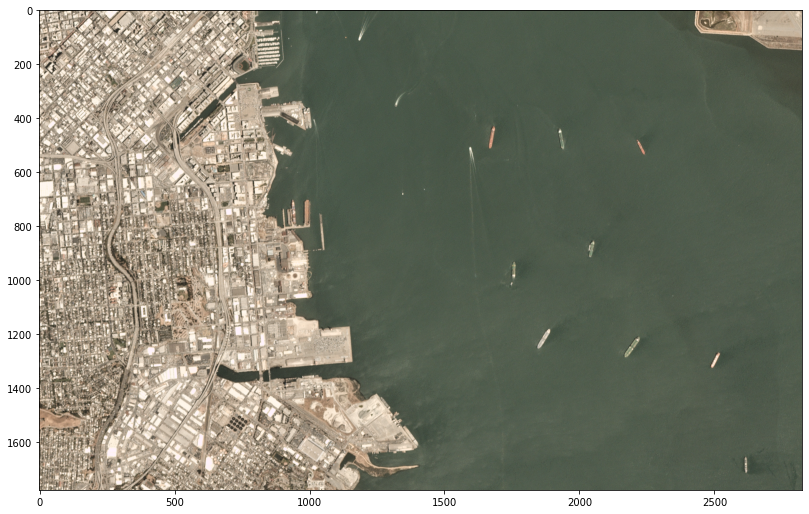

In [118]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [119]:
picture_tensor = picture_tensor.transpose(2,0,1)


In [120]:
picture_tensor.shape

(3, 1777, 2825)

### Search on the image

In [121]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [122]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [123]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:810 Y:10  [[0.01036857 0.9896315 ]]


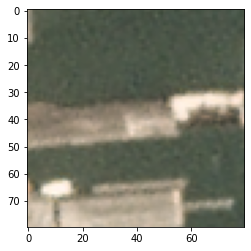

X:780 Y:250   [[0.07203779 0.92796224]]


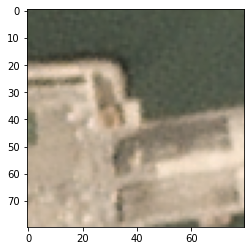

X:1640 Y:420  [[0.01858373 0.9814162 ]]


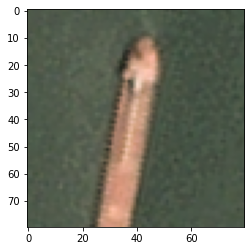

X:2190 Y:470  [[4.8260656e-04 9.9951744e-01]]


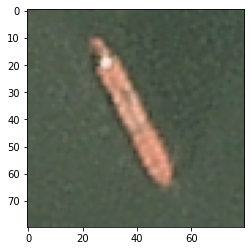

X:1720 Y:920  [[0.0663506  0.93364936]]


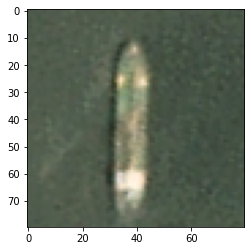

X:1830 Y:1170  [[0.00912928 0.99087065]]


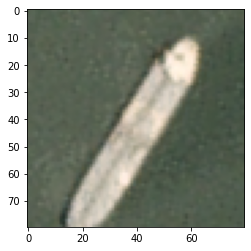

X:2160 Y:1200  [[0.01799158 0.98200846]]


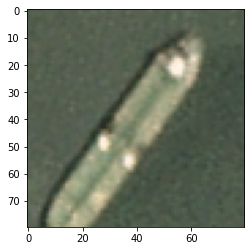

X:2470 Y:1250  [[0.07259484 0.9274052 ]]


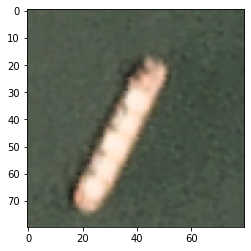

X:1340 Y:1540  [[0.08130733 0.9186927 ]]


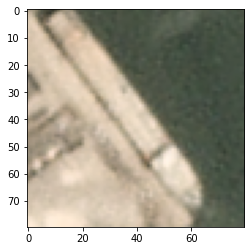

X:1220 Y:1650  [[0.05437545 0.94562453]]


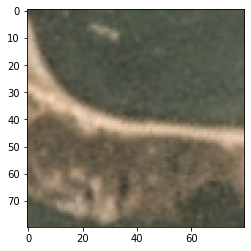

X:1310 Y:1650  [[0.0057115  0.99428844]]


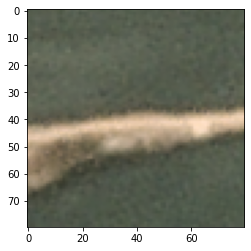

X:2740 Y:1690  

In [124]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [125]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [126]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1777, 2825, 3)

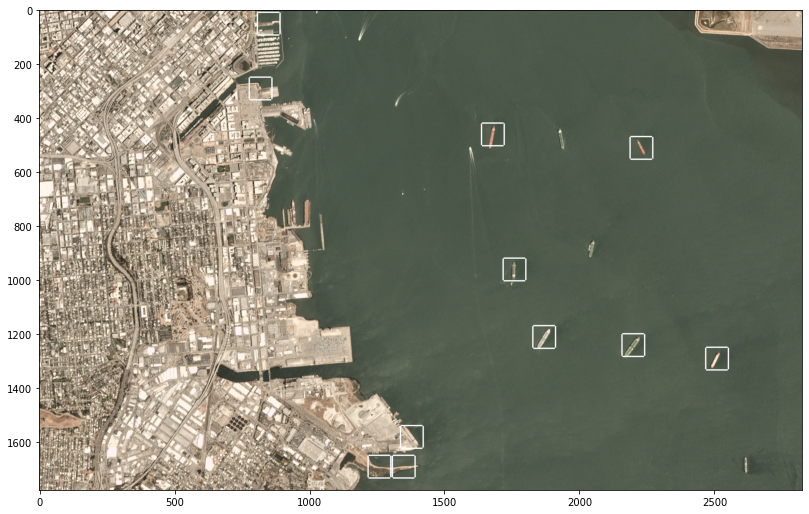

In [127]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()